## HIP54287
### (a quiet solar twin)

In [2]:
import wobble
import matplotlib.pyplot as plt
import numpy as np
import copy

Load up the results:

In [4]:
starid = 'hip54287'
a = wobble.star(starid+'_e2ds.hdf5', orders=np.arange(72)) 
a2 = copy.deepcopy(a)
a.load_results('../results/'+starid+'_wobbleflow.hdf5')
a2.load_results('../results/'+starid+'_wobbleflow_telluricsfixed.hdf5')

Text(0.5,0,'MJD')

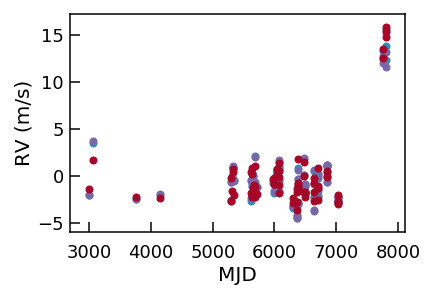

In [21]:
wobble_rvs = (a.time_rvs - a.bervs) - np.mean(a.time_rvs - a.bervs)
tfixed_rvs = (a2.time_rvs - a2.bervs) - np.mean(a2.time_rvs - a2.bervs)
pipeline_rvs = -1 * (a.pipeline_rvs - a.bervs) + np.mean(a.pipeline_rvs - a.bervs)
dates = a.dates - 2450000
plt.scatter(dates, wobble_rvs)
plt.scatter(dates, tfixed_rvs)
plt.scatter(dates, pipeline_rvs)
plt.ylabel('RV (m/s)', fontsize=20)
plt.xlabel('MJD', fontsize=20)

Cut off the last few (post-upgrade) epochs:

In [22]:
wobble_rvs = wobble_rvs[:-5]
tfixed_rvs = tfixed_rvs[:-5]
pipeline_rvs = pipeline_rvs[:-5]
dates = dates[:-5]

Text(0.5,0,'MJD')

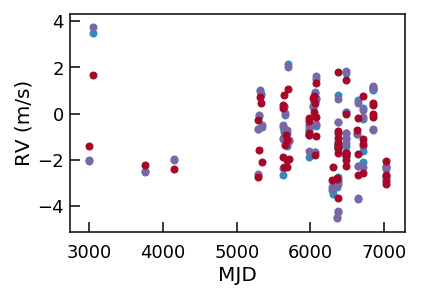

In [23]:
plt.scatter(dates, wobble_rvs)
plt.scatter(dates, tfixed_rvs)
plt.scatter(dates, pipeline_rvs)
plt.ylabel('RV (m/s)', fontsize=20)
plt.xlabel('MJD', fontsize=20)

In [24]:
print("Scatter of wobble RVs (tellurics free): {0:.3f}".format(np.std(wobble_rvs)))
print("Scatter of wobble RVs (tellurics fixed): {0:.3f}".format(np.std(tfixed_rvs)))
print("Scatter of HARPS pipeline RVs: {0:.3f}".format(np.std(pipeline_rvs)))

Scatter of wobble RVs (tellurics free): 1.553
Scatter of wobble RVs (tellurics fixed): 1.560
Scatter of HARPS pipeline RVs: 1.318
